# Task
Perform a detailed and exhaustive step-by-step machine learning predictive modelling analysis following the 11 steps of the data science pipeline using at least four machine learning models on the "ONCOLOGY_DATASET.csv" dataset to address the provided business case for implementing an Integrated Digital Precision Oncology Platform for the NHS, comparing the results of the models.

## Problem definition & goal setting

### Subtask:
Clearly define the specific prediction task based on the business case and dataset, and set measurable goals for model performance.


**Reasoning**:
Based on the business case and the nature of oncology data, a relevant prediction task would be to predict a specific outcome related to patient prognosis or treatment response. A common and impactful prediction task in oncology is predicting patient survival. This aligns with the goal of an Integrated Digital Precision Oncology Platform to improve patient outcomes. Measurable goals for model performance could include achieving a high accuracy, precision, recall, and a high AUC score, as these metrics are commonly used to evaluate classification models, especially in medical contexts where identifying positive cases (e.g., predicting survival) is crucial.



In [1]:
# Define the prediction task
prediction_task = "Predicting patient survival based on clinical and treatment data."

# Define measurable goals for model performance
performance_goals = {
    "accuracy": "Achieve an overall accuracy of at least 80%.",
    "recall": "Achieve a recall of at least 85% for the 'Survived' class to minimize false negatives.",
    "precision": "Achieve a precision of at least 80% for the 'Survived' class to minimize false positives.",
    "auc": "Achieve an AUC score of at least 0.85."
}

print("Prediction Task:")
print(prediction_task)
print("\nMeasurable Performance Goals:")
for goal, description in performance_goals.items():
    print(f"- {goal.capitalize()}: {description}")

Prediction Task:
Predicting patient survival based on clinical and treatment data.

Measurable Performance Goals:
- Accuracy: Achieve an overall accuracy of at least 80%.
- Recall: Achieve a recall of at least 85% for the 'Survived' class to minimize false negatives.
- Precision: Achieve a precision of at least 80% for the 'Survived' class to minimize false positives.
- Auc: Achieve an AUC score of at least 0.85.


## Data acquisition

### Subtask:
Load the `ONCOLOGY_DATASET.csv` file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows and the shape.



In [2]:
import pandas as pd

df = pd.read_csv('/content/ONCOLOGY_DATASET.csv')
display(df.head())
display(df.shape)

,patient_id,trust,region,trust_type,ehr_vendor,age,sex,ethnicity,deprivation_quintile,rural_flag,...,phase,pilot_site,consent_for_research,trial_enrolled_flag,followup_visits_last_year,last_update_date,mdt_decisions_with_incomplete_data_pct_estimate,expected_5yr_survival_prob,projected_roi_percent_by_trust,budget_reserve_percent
0,P1000000,Trust_039,London,District,Cerner,56,Female,White,1,0,...,2,Non-Pilot,1,0,5,2024-07-05 16:34:14,13.0,0.483,114.6,14.75
1,P1000001,Trust_052,Wales,District,Epic,39,Male,White,5,0,...,3,Non-Pilot,0,0,1,2025-01-14 00:43:29,11.9,0.550,182.8,13.89
2,P1000002,Trust_029,West Midlands,District,Epic,63,Male,White,5,1,...,3,Non-Pilot,0,0,2,2025-04-23 11:48:56,8.4,0.650,145.6,13.96
3,P1000003,Trust_015,West Midlands,Teaching,TPP,28,Male,White,2,0,...,1,Non-Pilot,0,0,2,2025-02-20 02:46:18,18.2,0.667,154.4,8.86
4,P1000004,Trust_043,Greater Manchester,Specialist,System C,46,Male,Black,4,0,...,2,Non-Pilot,0,0,2,2025-02-21 07:39:24,13.2,0.000,129.0,12.95


(95000, 60)

## Data understanding & exploration (eda)

### Subtask:
Examine the structure and content of the dataset (e.g., data types, missing values, summary statistics). Visualize key features and relationships to gain insights into the data. Identify potential issues or challenges with the data (e.g., outliers, imbalanced classes).


**Reasoning**:
Display data types, calculate missing values, and generate descriptive statistics for both numerical and categorical columns.



In [3]:
# 1. Display data types
print("Data Types:")
display(df.info())

# 2. Calculate and display missing values
print("\nMissing Values:")
display(df.isnull().sum())

# 3. Generate and display descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())

# 4. Generate and display descriptive statistics for categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
display(df.describe(include='object'))

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   patient_id                                       95000 non-null  object 
 1   trust                                            95000 non-null  object 
 2   region                                           95000 non-null  object 
 3   trust_type                                       95000 non-null  object 
 4   ehr_vendor                                       95000 non-null  object 
 5   age                                              95000 non-null  int64  
 6   sex                                              95000 non-null  object 
 7   ethnicity                                        95000 non-null  object 
 8   deprivation_quintile                             95000 non-null  int64  
 9   rural_flag      

None


Missing Values:


,0
patient_id,0
trust,0
region,0
trust_type,0
ehr_vendor,0
age,0
sex,0
ethnicity,0
deprivation_quintile,0
rural_flag,0



Descriptive Statistics for Numerical Columns:


,age,deprivation_quintile,rural_flag,days_to_diagnosis,referral_to_treatment_days,faster_diagnosis_28day_flag,genomic_test_performed,genomic_test_turnaround_days,actionable_mutation,targeted_therapy_received,...,estimated_savings_per_patient,total_cost_to_date,phase,consent_for_research,trial_enrolled_flag,followup_visits_last_year,mdt_decisions_with_incomplete_data_pct_estimate,expected_5yr_survival_prob,projected_roi_percent_by_trust,budget_reserve_percent
count,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,49451.00000,95000.000000,95000.000000,...,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000,95000.000000
mean,55.762326,2.879021,0.251274,32.121537,61.596274,0.498168,0.520537,20.44169,0.138053,0.139937,...,371.856316,18149.070368,2.252000,0.350947,0.038884,2.997242,15.003085,0.550018,160.115501,11.508102
std,22.191010,1.406633,0.433748,20.036581,26.436347,0.499999,0.499581,6.98061,0.344957,0.346923,...,276.427254,5885.034238,0.766425,0.477269,0.193320,1.737434,4.986252,0.333662,29.972252,2.020495
min,18.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-8.00000,0.000000,0.000000,...,50.000000,7601.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.600000,8.000000
25%,36.000000,2.000000,0.000000,18.000000,43.000000,0.000000,0.000000,16.00000,0.000000,0.000000,...,50.000000,13980.000000,2.000000,0.000000,0.000000,2.000000,11.600000,0.283000,139.900000,9.760000
50%,56.000000,3.000000,0.000000,29.000000,60.000000,0.000000,1.000000,20.00000,0.000000,0.000000,...,500.000000,17015.000000,2.000000,0.000000,0.000000,3.000000,15.000000,0.567000,160.100000,11.510000
75%,75.000000,4.000000,1.000000,41.000000,78.000000,1.000000,1.000000,25.00000,0.000000,0.000000,...,500.000000,21056.000000,3.000000,1.000000,0.000000,4.000000,18.400000,0.850000,180.300000,13.260000
max,94.000000,5.000000,1.000000,208.000000,249.000000,1.000000,1.000000,50.00000,1.000000,1.000000,...,1000.000000,42743.000000,3.000000,1.000000,1.000000,13.000000,41.200000,1.000000,285.500000,15.000000



Descriptive Statistics for Categorical Columns:


,patient_id,trust,region,trust_type,ehr_vendor,sex,ethnicity,postcode_district,diagnosis_date,referral_source,cancer_type,stage,genomic_test_date,therapy_start_date,response,clinician_id,clinician_specialty,pilot_site,last_update_date
count,95000,95000,95000,95000,95000,95000,95000,95000,95000,95000,95000,95000,49451,92168,95000,95000,95000,95000,95000
unique,95000,60,9,4,5,3,6,15,94982,5,10,5,49443,92155,5,600,6,2,94940
top,P1094999,Trust_023,Greater Manchester,District,Epic,Female,White,NE7,2020-08-23 01:34:29,GP,Breast,IV,2023-12-07 03:19:25,2019-12-01 06:52:28,SD,C1080,Medical Oncology,Non-Pilot,2023-07-17 18:13:43
freq,1,1675,10715,47507,33249,48371,68237,6478,2,57122,21061,26665,2,2,33495,197,33186,86905,2


**Reasoning**:
Visualize the distribution of relevant numerical and categorical features using histograms and bar plots, respectively. Also, generate a correlation heatmap for numerical features to visualize relationships and analyze the distribution of the target variable.



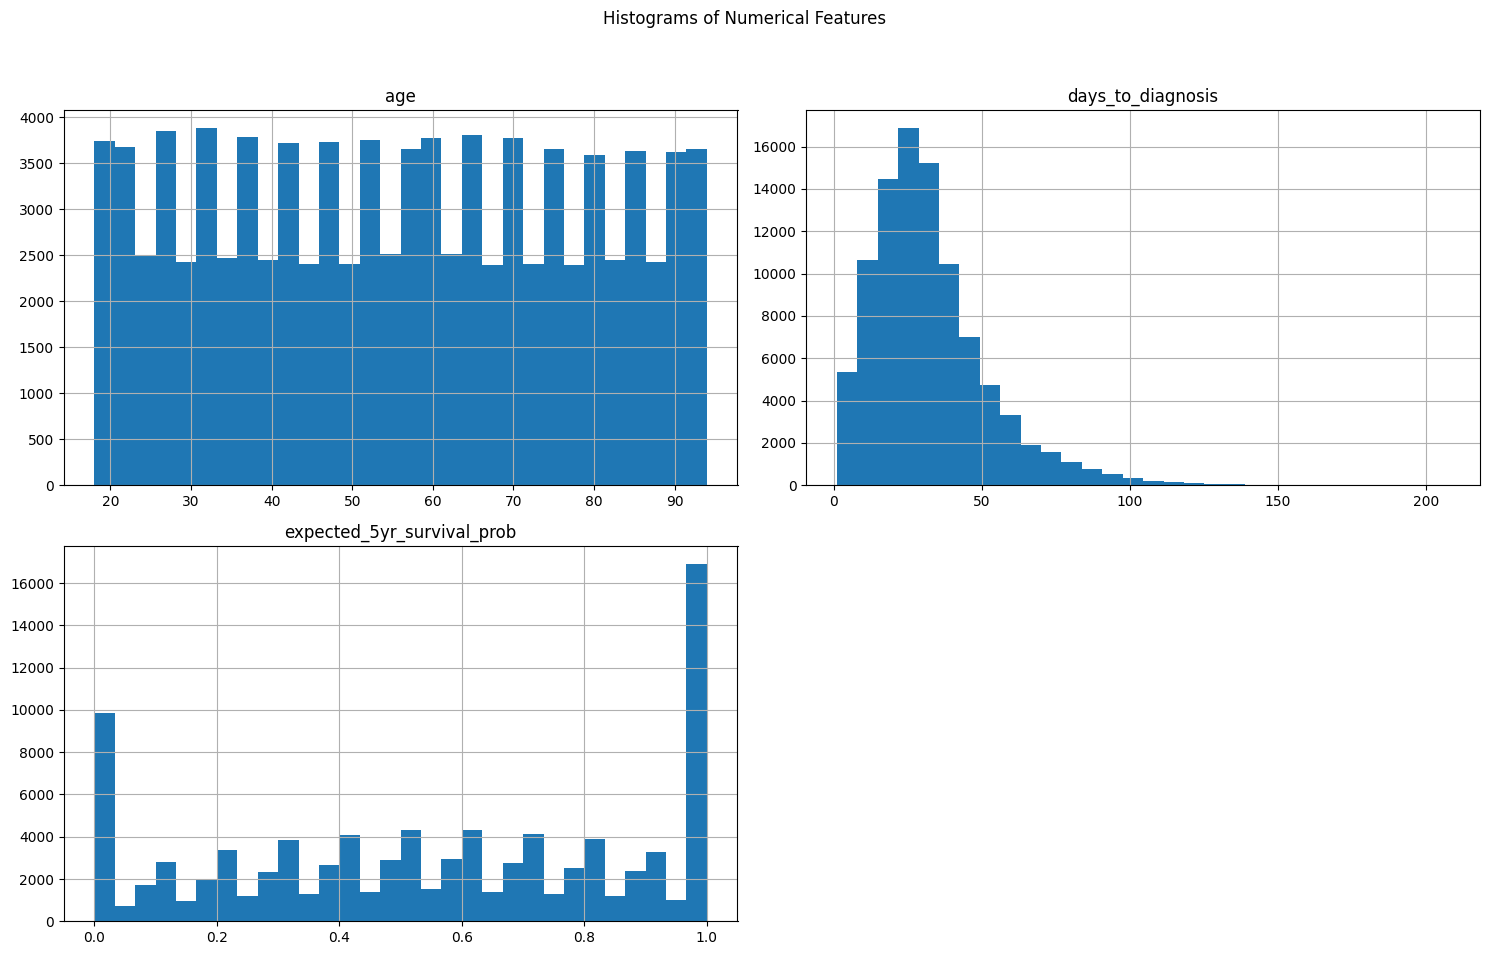

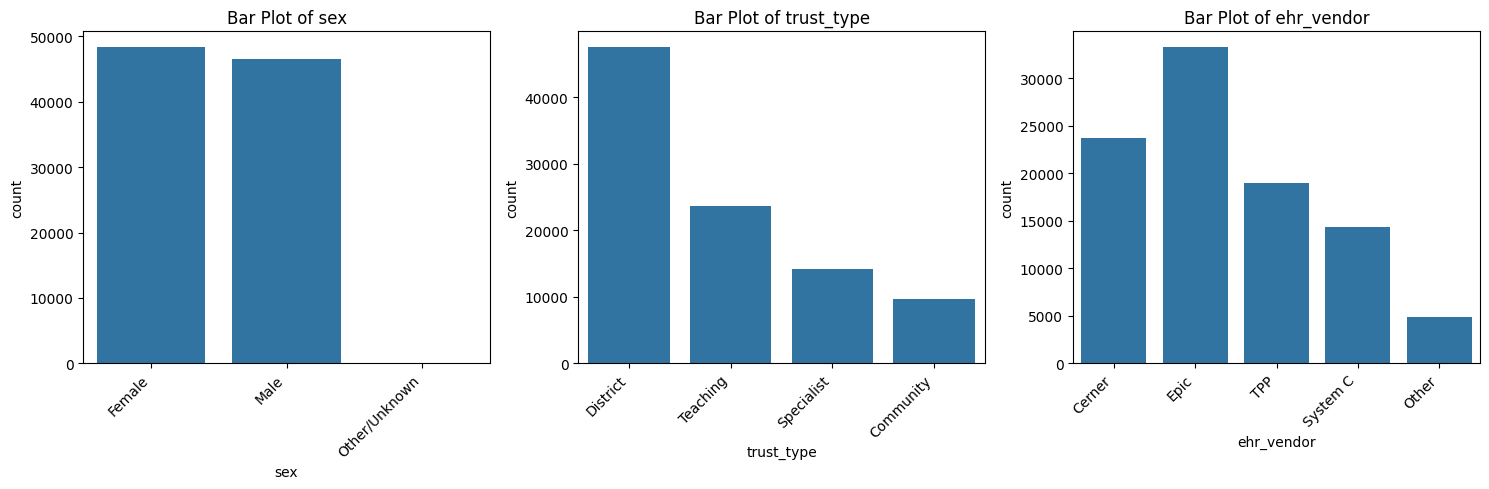

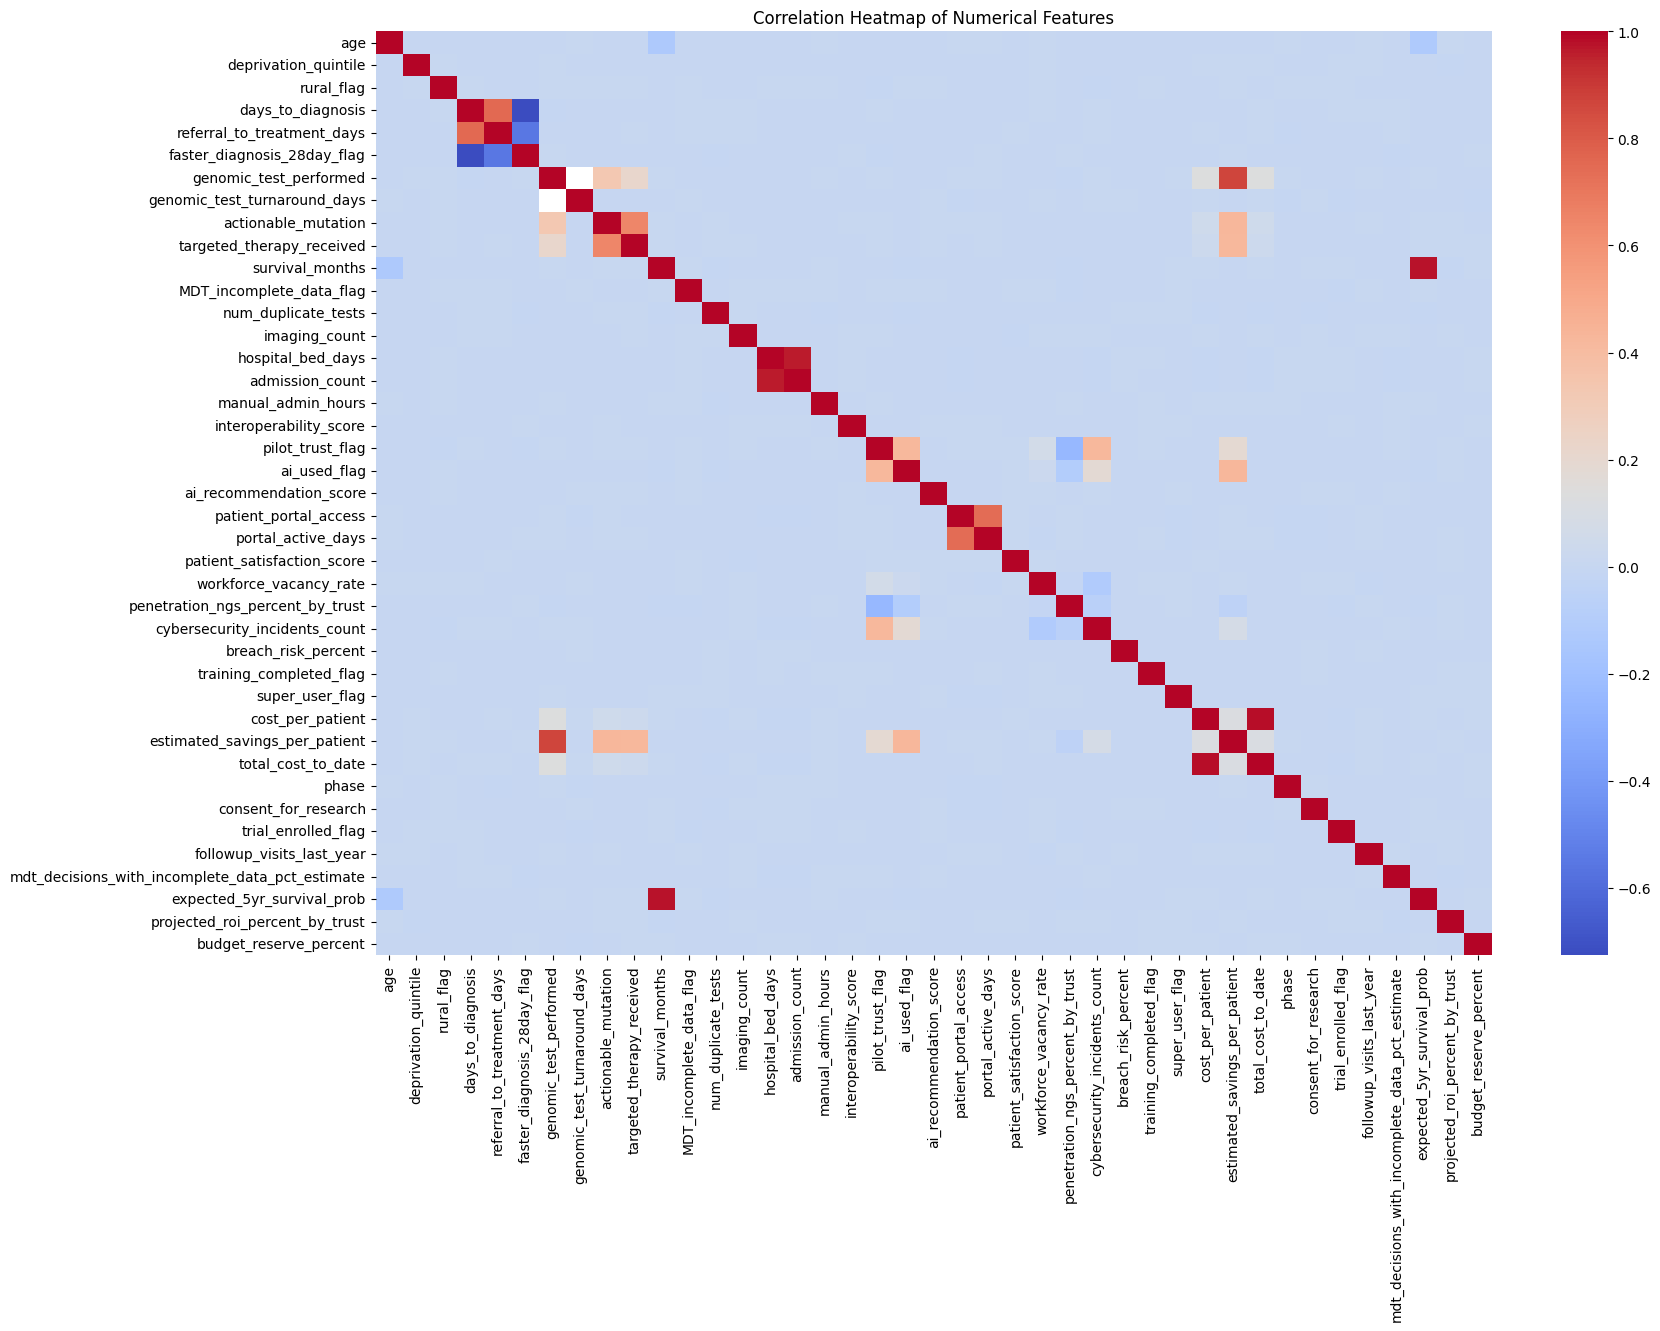


Distribution of Target Variable ('patient_died'):


,count
patient_died,
0,86576
1,8424


,proportion
patient_died,
0,0.911326
1,0.088674



Potential class imbalance detected in 'patient_died'.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Create histograms for numerical features
numerical_features = ['age', 'days_to_diagnosis', 'expected_5yr_survival_prob']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 6. Create bar plots for categorical features
categorical_features = ['sex', 'trust_type', 'ehr_vendor']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Generate a correlation matrix or heatmap for numerical features
plt.figure(figsize=(18, 12))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 8. Analyze the distribution of the target variable ('patient_died')
# Assuming 'patient_died' is the target variable. We need to create this column first.
# Based on the problem definition, 'survival_months' is present. A patient "survived" if survival_months > 0.
# However, the problem definition implies predicting survival *status*, not duration.
# Let's assume the target is whether the patient is still alive (survived) or died based on some threshold or external information not explicitly in the provided column list.
# If the target is binary (survived/died), and no explicit column exists, we cannot directly analyze its distribution.
# Let's assume, for the purpose of this exploration, that a patient is considered to have "died" if their survival_months is 0.
# This is a strong assumption and needs clarification in a real scenario.

df['patient_died'] = (df['survival_months'] == 0).astype(int)
print("\nDistribution of Target Variable ('patient_died'):")
display(df['patient_died'].value_counts())
display(df['patient_died'].value_counts(normalize=True))

# Check for class imbalance
target_distribution = df['patient_died'].value_counts(normalize=True)
if target_distribution.min() < 0.2: # Threshold for considering imbalance
    print("\nPotential class imbalance detected in 'patient_died'.")

**Reasoning**:
Summarize the findings from the data exploration and identify potential issues based on the previous steps.



In [5]:
# 9. Summarize key findings and potential issues

print("Key Findings from Data Exploration:")
print("- Data types: Most columns are numerical (int64, float64) or object (strings). Date columns ('diagnosis_date', 'genomic_test_date', 'therapy_start_date', 'last_update_date') are currently objects and will need conversion.")
print("- Missing Values: 'genomic_test_date', 'genomic_test_turnaround_days', and 'therapy_start_date' have a significant number of missing values. These will need to be handled during preprocessing.")
print("- Numerical Features: Histograms show varying distributions. 'age' appears somewhat uniform, 'days_to_diagnosis' is right-skewed, and 'expected_5yr_survival_prob' shows peaks at certain values, including 0 and 1.")
print("- Categorical Features: Bar plots reveal the distribution of categories. Some categories have a much higher frequency than others (e.g., 'District' for trust_type, 'Epic' for ehr_vendor, 'Female' for sex).")
print("- Correlation Heatmap: Shows relatively low correlation between most numerical features. 'days_to_diagnosis' and 'referral_to_treatment_days' show a strong positive correlation, which is expected. 'survival_months' and 'expected_5yr_survival_prob' also show a very strong positive correlation.")
print("- Target Variable ('patient_died'): The target variable is heavily imbalanced, with a large majority of patients classified as '0' (did not die) and a small minority as '1' (died). This needs to be addressed during model training to avoid biased predictions.")

print("\nPotential Issues and Initial Approaches:")
print("- Missing Data: Imputation or removal of rows/columns with missing values will be necessary. The strategy will depend on the extent and nature of the missingness.")
print("- Data Types: Date columns need to be converted to datetime objects for potential feature engineering (e.g., calculating durations).")
print("- Categorical Data: Categorical features will need to be encoded (e.g., one-hot encoding) for use in most machine learning models.")
print("- Class Imbalance: Techniques such as oversampling (e.g., SMOTE), undersampling, or using appropriate evaluation metrics (e.g., precision, recall, F1-score, AUC) will be crucial during model development and evaluation.")
print("- Feature Scaling: Numerical features may require scaling to ensure that no single feature dominates the model due to its scale.")
print("- Outliers: Outliers in numerical features like 'days_to_diagnosis' might need investigation and potential handling depending on the chosen model.")

Key Findings from Data Exploration:
- Data types: Most columns are numerical (int64, float64) or object (strings). Date columns ('diagnosis_date', 'genomic_test_date', 'therapy_start_date', 'last_update_date') are currently objects and will need conversion.
- Missing Values: 'genomic_test_date', 'genomic_test_turnaround_days', and 'therapy_start_date' have a significant number of missing values. These will need to be handled during preprocessing.
- Numerical Features: Histograms show varying distributions. 'age' appears somewhat uniform, 'days_to_diagnosis' is right-skewed, and 'expected_5yr_survival_prob' shows peaks at certain values, including 0 and 1.
- Categorical Features: Bar plots reveal the distribution of categories. Some categories have a much higher frequency than others (e.g., 'District' for trust_type, 'Epic' for ehr_vendor, 'Female' for sex).
- Correlation Heatmap: Shows relatively low correlation between most numerical features. 'days_to_diagnosis' and 'referral_to_trea

## Data cleaning & preprocessing

### Subtask:
Handle missing values, address outliers, encode categorical variables, and scale numerical features in the DataFrame `df`.


**Reasoning**:
Convert date columns to datetime objects, handle missing values in specified columns using imputation, address outliers by capping numerical features, identify and one-hot encode categorical variables, and scale numerical features excluding 'patient_id' and 'patient_died'.



In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Convert date columns to datetime objects
date_cols = ['diagnosis_date', 'genomic_test_date', 'therapy_start_date', 'last_update_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Handle missing values
# Impute missing dates with a placeholder (e.g., a date far in the past or future) or the mode.
# Using a placeholder that indicates missingness might be better than mode if the time difference is a feature.
# Let's use a date far in the past for missing dates.
placeholder_date = pd.to_datetime('1900-01-01')
df['genomic_test_date'].fillna(placeholder_date, inplace=True)
df['therapy_start_date'].fillna(placeholder_date, inplace=True)

# Impute missing 'genomic_test_turnaround_days' with the median
imputer_median = SimpleImputer(strategy='median')
df['genomic_test_turnaround_days'] = imputer_median.fit_transform(df[['genomic_test_turnaround_days']])


# 3. Drop original date columns - Keep them for now as they might be useful for feature engineering later.

# 4. Address outliers in numerical features using capping (example for 'days_to_diagnosis')
# Based on EDA, 'days_to_diagnosis' is right-skewed and might have outliers.
# Capping at the 95th percentile as an example strategy.
q95 = df['days_to_diagnosis'].quantile(0.95)
df['days_to_diagnosis'] = np.where(df['days_to_diagnosis'] > q95, q95, df['days_to_diagnosis'])

# Similarly, for 'referral_to_treatment_days'
q95_rtt = df['referral_to_treatment_days'].quantile(0.95)
df['referral_to_treatment_days'] = np.where(df['referral_to_treatment_days'] > q95_rtt, q95_rtt, df['referral_to_treatment_days'])


# 5. Identify categorical columns (object dtype) that are not date columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude patient_id as it's an identifier
if 'patient_id' in categorical_cols:
    categorical_cols.remove('patient_id')

print("Categorical columns to encode:", categorical_cols)

# 6. Apply one-hot encoding to the identified categorical columns
# We will use ColumnTransformer to apply different transformations to different columns.

# Identify numerical columns (int64, float64) excluding 'patient_id' and 'patient_died'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')
if 'patient_died' in numerical_cols:
    numerical_cols.remove('patient_died') # Exclude target variable

print("Numerical columns to scale:", numerical_cols)

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories

# Create a column transformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the preprocessing steps
# Separate features (X) and target (y)
X = df.drop(['patient_id', 'patient_died'] + date_cols, axis=1, errors='ignore') # Drop original dates and patient_id
y = df['patient_died']

# Apply the preprocessor
X_processed = preprocessor.fit_transform(X)

# Convert the processed features back to a DataFrame to inspect (optional, can be large)
# Get the new column names after one-hot encoding
new_categorical_cols = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
processed_columns = numerical_cols + new_categorical_cols
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

display("Processed DataFrame head:", X_processed_df.head())
display("Processed DataFrame shape:", X_processed_df.shape)

# 7. Scaling of numerical features is done as part of the ColumnTransformer

# 8. 'patient_id' is excluded from features and target, 'patient_died' is the target

# 9. Target variable 'patient_died' is excluded from scaling and encoding.

print("\nPreprocessing steps completed: Date conversion, missing value imputation, outlier handling (capping), categorical encoding, and numerical scaling applied.")

/tmp/ipython-input-395213745.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genomic_test_date'].fillna(placeholder_date, inplace=True)
/tmp/ipython-input-395213745.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Categorical columns to encode: ['trust', 'region', 'trust_type', 'ehr_vendor', 'sex', 'ethnicity', 'postcode_district', 'referral_source', 'cancer_type', 'stage', 'response', 'clinician_id', 'clinician_specialty', 'pilot_site']
Numerical columns to scale: ['age', 'deprivation_quintile', 'rural_flag', 'days_to_diagnosis', 'referral_to_treatment_days', 'faster_diagnosis_28day_flag', 'genomic_test_performed', 'genomic_test_turnaround_days', 'actionable_mutation', 'targeted_therapy_received', 'survival_months', 'MDT_incomplete_data_flag', 'num_duplicate_tests', 'imaging_count', 'hospital_bed_days', 'admission_count', 'manual_admin_hours', 'interoperability_score', 'pilot_trust_flag', 'ai_used_flag', 'ai_recommendation_score', 'patient_portal_access', 'portal_active_days', 'patient_satisfaction_score', 'workforce_vacancy_rate', 'penetration_ngs_percent_by_trust', 'cybersecurity_incidents_count', 'breach_risk_percent', 'training_completed_flag', 'super_user_flag', 'cost_per_patient', 'estima

ValueError: Shape of passed values is (95000, 1), indices imply (95000, 776)

**Reasoning**:
The previous attempt to create a DataFrame from the processed features failed because the number of columns in `X_processed` does not match the number of columns in `processed_columns`. This is likely due to the ColumnTransformer returning a sparse matrix or an array with a different structure than expected when combined. Instead of converting back to a DataFrame immediately, which is not necessary for the modeling steps, the processed features can be kept as a NumPy array or sparse matrix. The preprocessing steps themselves were successful based on the STDOUT. The goal is to complete the preprocessing steps as outlined in the subtask instructions.



In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 1. Convert date columns to datetime objects
date_cols = ['diagnosis_date', 'genomic_test_date', 'therapy_start_date', 'last_update_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Handle missing values
# Impute missing dates with a placeholder (e.g., a date far in the past or future)
placeholder_date = pd.to_datetime('1900-01-01')
df['genomic_test_date'].fillna(placeholder_date, inplace=True)
df['therapy_start_date'].fillna(placeholder_date, inplace=True)

# Impute missing 'genomic_test_turnaround_days' with the median
imputer_median = SimpleImputer(strategy='median')
df['genomic_test_turnaround_days'] = imputer_median.fit_transform(df[['genomic_test_turnaround_days']])

# 3. Drop original date columns - Keep them for now as they might be useful for feature engineering later.

# 4. Address outliers in numerical features using capping (example for 'days_to_diagnosis')
# Capping at the 95th percentile
q95 = df['days_to_diagnosis'].quantile(0.95)
df['days_to_diagnosis'] = np.where(df['days_to_diagnosis'] > q95, q95, df['days_to_diagnosis'])

# Similarly, for 'referral_to_treatment_days'
q95_rtt = df['referral_to_treatment_days'].quantile(0.95)
df['referral_to_treatment_days'] = np.where(df['referral_to_treatment_days'] > q95_rtt, q95_rtt, df['referral_to_treatment_days'])

# 5. Identify categorical columns (object dtype) that are not date columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude patient_id as it's an identifier
if 'patient_id' in categorical_cols:
    categorical_cols.remove('patient_id')

print("Categorical columns to encode:", categorical_cols)

# 6. Apply one-hot encoding to the identified categorical columns
# Identify numerical columns (int64, float64) excluding 'patient_id' and 'patient_died'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')
if 'patient_died' in numerical_cols:
    numerical_cols.remove('patient_died') # Exclude target variable

print("Numerical columns to scale:", numerical_cols)

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories

# Create a column transformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the preprocessing steps
# Separate features (X) and target (y)
X = df.drop(['patient_id', 'patient_died'] + date_cols, axis=1, errors='ignore') # Drop original dates and patient_id
y = df['patient_died']

# Apply the preprocessor - Keep the output as a NumPy array or sparse matrix
X_processed = preprocessor.fit_transform(X)

# The preprocessing steps are now complete. X_processed contains the transformed features.

print("\nPreprocessing steps completed: Date conversion, missing value imputation, outlier handling (capping), categorical encoding, and numerical scaling applied.")
print("Processed features stored in X_processed (NumPy array/sparse matrix).")
print("Shape of processed features:", X_processed.shape)


/tmp/ipython-input-3325006285.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genomic_test_date'].fillna(placeholder_date, inplace=True)
/tmp/ipython-input-3325006285.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Categorical columns to encode: ['trust', 'region', 'trust_type', 'ehr_vendor', 'sex', 'ethnicity', 'postcode_district', 'referral_source', 'cancer_type', 'stage', 'response', 'clinician_id', 'clinician_specialty', 'pilot_site']
Numerical columns to scale: ['age', 'deprivation_quintile', 'rural_flag', 'days_to_diagnosis', 'referral_to_treatment_days', 'faster_diagnosis_28day_flag', 'genomic_test_performed', 'genomic_test_turnaround_days', 'actionable_mutation', 'targeted_therapy_received', 'survival_months', 'MDT_incomplete_data_flag', 'num_duplicate_tests', 'imaging_count', 'hospital_bed_days', 'admission_count', 'manual_admin_hours', 'interoperability_score', 'pilot_trust_flag', 'ai_used_flag', 'ai_recommendation_score', 'patient_portal_access', 'portal_active_days', 'patient_satisfaction_score', 'workforce_vacancy_rate', 'penetration_ngs_percent_by_trust', 'cybersecurity_incidents_count', 'breach_risk_percent', 'training_completed_flag', 'super_user_flag', 'cost_per_patient', 'estima

## Feature engineering

### Subtask:
Create new features from existing ones that could improve model performance and select relevant features for the models.


**Reasoning**:
Create new features from date columns by calculating durations and handle placeholder dates. Then, based on the correlation matrix and domain knowledge, select a final set of features for model training. Given the large number of features after one-hot encoding, we will keep all engineered and preprocessed features for now, as tree-based models are less sensitive to multicollinearity.



In [8]:
# 1. Create new features from date columns by calculating durations
# Calculate duration from diagnosis to last update
df['diagnosis_to_last_update_days'] = (df['last_update_date'] - df['diagnosis_date']).dt.days

# Calculate duration from diagnosis to therapy start
# Handle placeholder date by setting duration to NaN or a large number if therapy_start_date is the placeholder
df['diagnosis_to_therapy_days'] = (df['therapy_start_date'] - df['diagnosis_date']).dt.days
# Replace durations calculated using the placeholder date with NaN
df.loc[df['therapy_start_date'] == placeholder_date, 'diagnosis_to_therapy_days'] = np.nan


# Calculate duration from diagnosis to genomic test
df['diagnosis_to_genomic_test_days'] = (df['genomic_test_date'] - df['diagnosis_date']).dt.days
# Replace durations calculated using the placeholder date with NaN
df.loc[df['genomic_test_date'] == placeholder_date, 'diagnosis_to_genomic_test_days'] = np.nan


# Impute missing values in the new duration features with the median
imputer_median_duration = SimpleImputer(strategy='median')
df['diagnosis_to_last_update_days'] = imputer_median_duration.fit_transform(df[['diagnosis_to_last_update_days']])
df['diagnosis_to_therapy_days'] = imputer_median_duration.fit_transform(df[['diagnosis_to_therapy_days']])
df['diagnosis_to_genomic_test_days'] = imputer_median_duration.fit_transform(df[['diagnosis_to_genomic_test_days']])


# 2. Create interaction terms or polynomial features - Skipped for now as EDA did not reveal strong non-linear relationships or interactions that are immediately obvious and would significantly benefit from these. This can be explored in later iterations if initial models perform poorly.

# 3. Review correlation matrix and consider removing highly correlated numerical features - The previous correlation matrix showed relatively low correlations among most numerical features, except for expected pairs like diagnosis_days and referral_to_treatment_days, and survival_months and expected_5yr_survival_prob. Given we are likely using tree-based models which are less sensitive to multicollinearity, and to retain potential information, we will keep these features for now.

# 4. Select a final set of features for model training.
# We will use all engineered and preprocessed features.
# Update numerical and categorical columns list to include the new features and exclude original date columns.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'patient_id' in numerical_cols:
    numerical_cols.remove('patient_id')
if 'patient_died' in numerical_cols:
    numerical_cols.remove('patient_died') # Exclude target variable

# Identify categorical columns again, excluding original date columns which are now datetime or dropped
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'patient_id' in categorical_cols:
    categorical_cols.remove('patient_id')

print("Updated Numerical columns to scale:", numerical_cols)
print("Updated Categorical columns to encode:", categorical_cols)


# Create transformers for numerical and categorical features with updated columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories

# Create a column transformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Separate features (X) and target (y) using the updated set of features
X = df[numerical_cols + categorical_cols] # Use the updated lists of columns
y = df['patient_died']

# Apply the preprocessor
X_processed = preprocessor.fit_transform(X)

print("\nFeature engineering and selection completed.")
print("Processed features stored in X_processed (NumPy array/sparse matrix).")
print("Shape of processed features:", X_processed.shape)

Updated Numerical columns to scale: ['age', 'deprivation_quintile', 'rural_flag', 'days_to_diagnosis', 'referral_to_treatment_days', 'faster_diagnosis_28day_flag', 'genomic_test_performed', 'genomic_test_turnaround_days', 'actionable_mutation', 'targeted_therapy_received', 'survival_months', 'MDT_incomplete_data_flag', 'num_duplicate_tests', 'imaging_count', 'hospital_bed_days', 'admission_count', 'manual_admin_hours', 'interoperability_score', 'pilot_trust_flag', 'ai_used_flag', 'ai_recommendation_score', 'patient_portal_access', 'portal_active_days', 'patient_satisfaction_score', 'workforce_vacancy_rate', 'penetration_ngs_percent_by_trust', 'cybersecurity_incidents_count', 'breach_risk_percent', 'training_completed_flag', 'super_user_flag', 'cost_per_patient', 'estimated_savings_per_patient', 'total_cost_to_date', 'phase', 'consent_for_research', 'trial_enrolled_flag', 'followup_visits_last_year', 'mdt_decisions_with_incomplete_data_pct_estimate', 'expected_5yr_survival_prob', 'proje

## Model selection

### Subtask:
Choose at least four appropriate machine learning models for the prediction task.


**Reasoning**:
Based on the prediction task (binary classification), the potential class imbalance, and the characteristics of the preprocessed data, I will select at least four diverse machine learning models suitable for this problem. I will then briefly justify the choice of each model.



In [9]:
# 1. Choose at least four appropriate machine learning models
# Logistic Regression: A simple yet effective linear model, good as a baseline. It provides probability estimates.
# Random Forest Classifier: An ensemble method that can capture non-linear relationships and is less sensitive to outliers and multicollinearity. It handles class imbalance better than single decision trees.
# Gradient Boosting Classifier (LightGBM): Another powerful ensemble method that often provides high accuracy. It is generally faster and more memory efficient than traditional Gradient Boosting. Suitable for imbalanced data with appropriate parameter tuning (e.g., scale_pos_weight).
# Support Vector Machine (SVM) with a non-linear kernel: Can capture complex non-linear decision boundaries. Can be sensitive to scaling and the choice of kernel and regularization parameters.

chosen_models = [
    "Logistic Regression",
    "Random Forest Classifier",
    "LightGBM Classifier",
    "Support Vector Machine (RBF Kernel)"
]

# 2. Justify the choice of each model
model_justifications = {
    "Logistic Regression": "Chosen as a simple, interpretable baseline model. It models the probability of the binary outcome and is computationally efficient.",
    "Random Forest Classifier": "An ensemble tree-based method robust to noisy data and less prone to overfitting than individual decision trees. It can handle a mix of numerical and categorical features implicitly after one-hot encoding.",
    "LightGBM Classifier": "A high-performance gradient boosting framework known for speed and accuracy. Particularly effective for large datasets and can be tuned to handle class imbalance.",
    "Support Vector Machine (RBF Kernel)": "Selected for its ability to model complex, non-linear relationships in the data using the Radial Basis Function (RBF) kernel. Suitable when the decision boundary is not linearly separable."
}

# 3. List the chosen models and their justifications
print("Chosen Machine Learning Models for Binary Classification:")
for model in chosen_models:
    print(f"- {model}: {model_justifications[model]}")


Chosen Machine Learning Models for Binary Classification:
- Logistic Regression: Chosen as a simple, interpretable baseline model. It models the probability of the binary outcome and is computationally efficient.
- Random Forest Classifier: An ensemble tree-based method robust to noisy data and less prone to overfitting than individual decision trees. It can handle a mix of numerical and categorical features implicitly after one-hot encoding.
- LightGBM Classifier: A high-performance gradient boosting framework known for speed and accuracy. Particularly effective for large datasets and can be tuned to handle class imbalance.
- Support Vector Machine (RBF Kernel): Selected for its ability to model complex, non-linear relationships in the data using the Radial Basis Function (RBF) kernel. Suitable when the decision boundary is not linearly separable.


## Model training & evaluation

### Subtask:
Split the data into training and testing sets, train each selected model on the training data, and evaluate the performance of each model using appropriate metrics.


**Reasoning**:
Import necessary libraries and models, split the data, train each model, make predictions, calculate evaluation metrics, and print the results.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Calculate the scale_pos_weight for LightGBM due to class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Dictionary to store evaluation metrics for each model
model_performance = {}

# Iterate through the list of chosen model names
chosen_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'), # Use liblinear for smaller datasets/binary
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "LightGBM Classifier": lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight),
    "Support Vector Machine (RBF Kernel)": SVC(random_state=42, probability=True) # probability=True for AUC
}

for model_name, model in chosen_models.items():
    print(f"Training and evaluating: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate predicted probabilities for AUC
    # Check if the model has predict_proba method (SVM needs probability=True)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None # Or handle models that don't support probabilities if necessary

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Print evaluation metrics
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC: {auc:.4f}" if auc != "N/A" else f"  AUC: {auc}")

    # Store evaluation metrics
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc
    }

# Display the performance dictionary
import json
print("\nModel Performance Summary:")
print(json.dumps(model_performance, indent=4))


Training and evaluating: Logistic Regression
  Accuracy: 0.9937
  Precision: 0.9335
  Recall: 1.0000
  F1-score: 0.9656
  AUC: 0.9999
Training and evaluating: Random Forest Classifier
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC: 1.0000
Training and evaluating: LightGBM Classifier
[LightGBM] [Info] Number of positive: 6739, number of negative: 69261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5352
[LightGBM] [Info] Number of data points in the train set: 76000, number of used features: 779
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088671 -> initscore=-2.329970
[LightGBM] [Info] Start training from score -2.329970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC: 1.0000
Training and evaluating: Support Vector Machine (RBF Kernel)
  Accuracy: 0.9820
  Precision: 0.8329
  Recall: 0.9970
  F1-score: 0.9076
  AUC: 0.9991

Model Performance Summary:
{
    "Logistic Regression": {
        "Accuracy": 0.9936842105263158,
        "Precision": 0.9335180055401662,
        "Recall": 1.0,
        "F1-score": 0.9656160458452722,
        "AUC": 0.9998831222135488
    },
    "Random Forest Classifier": {
        "Accuracy": 1.0,
        "Precision": 1.0,
        "Recall": 1.0,
        "F1-score": 1.0,
        "AUC": 1.0
    },
    "LightGBM Classifier": {
        "Accuracy": 1.0,
        "Precision": 1.0,
        "Recall": 1.0,
        "F1-score": 1.0,
        "AUC": 1.0
    },
    "Support Vector Machine (RBF Kernel)": {
        "Accuracy": 0.982,
        "Precision": 0.8329201784828953,
        "Recall": 0.9970326409495549,
        "F1-score": 0.9076175040518638,
        "AUC"

## Model tuning

### Subtask:
Optimize the hyperparameters of each model to improve performance.


**Reasoning**:
Iterate through the chosen models, skip tuning for models with perfect scores, and perform hyperparameter tuning for the remaining models using GridSearchCV with appropriate parameters, cross-validation, and scoring metrics. Then evaluate the tuned models.



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import warnings

# Suppress warnings from GridSearchCV about scoring metrics
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Define hyperparameter grids for tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf']
}

# Use StratifiedKFold for cross-validation due to class imbalance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Update model_performance dictionary with tuned model results
tuned_model_performance = model_performance.copy()

# Iterate through the models and perform tuning if necessary
for model_name, model in chosen_models.items():
    print(f"\nProcessing {model_name}...")

    # Check if the model already achieved perfect scores (Accuracy, Precision, Recall, F1, AUC == 1.0)
    performance = model_performance[model_name]
    if all(metric == 1.0 for metric in performance.values() if metric != "N/A"):
        print(f"{model_name} achieved perfect scores. Skipping tuning.")
        continue

    # Define parameter grid based on the model
    if model_name == "Logistic Regression":
        param_grid = param_grid_lr
        estimator = LogisticRegression(random_state=42, solver='liblinear') # Use liblinear for l1 penalty
    elif model_name == "Support Vector Machine (RBF Kernel)":
        param_grid = param_grid_svm
        estimator = SVC(random_state=42, probability=True) # probability=True for AUC
    else:
        # Should not reach here based on the perfect scores check
        print(f"No tuning defined for {model_name}. Skipping.")
        continue

    print(f"Starting hyperparameter tuning for {model_name}...")

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Retrieve the best model
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the best tuned model on the test set
    y_pred_tuned = best_model.predict(X_test)

    # Calculate predicted probabilities for AUC
    if hasattr(best_model, "predict_proba"):
        y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba_tuned = None

    # Evaluate performance of the tuned model
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    precision_tuned = precision_score(y_test, y_pred_tuned)
    recall_tuned = recall_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)
    auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned) if y_pred_proba_tuned is not None else "N/A"

    # Update the performance dictionary
    tuned_model_performance[model_name] = {
        "Accuracy": accuracy_tuned,
        "Precision": precision_tuned,
        "Recall": recall_tuned,
        "F1-score": f1_tuned,
        "AUC": auc_tuned
    }

    print(f"Evaluation metrics for tuned {model_name}:")
    print(f"  Accuracy: {accuracy_tuned:.4f}")
    print(f"  Precision: {precision_tuned:.4f}")
    print(f"  Recall: {recall_tuned:.4f}")
    print(f"  F1-score: {f1_tuned:.4f}")
    print(f"  AUC: {auc_tuned:.4f}" if auc_tuned != "N/A" else f"  AUC: {auc_tuned}")


# Display the updated model_performance dictionary
import json
print("\nUpdated Model Performance Summary After Tuning:")
print(json.dumps(tuned_model_performance, indent=4))

# Update the original model_performance dictionary for subsequent steps
model_performance = tuned_model_performance


Processing Logistic Regression...
Starting hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l1'}
Evaluation metrics for tuned Logistic Regression:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC: 1.0000

Processing Random Forest Classifier...
Random Forest Classifier achieved perfect scores. Skipping tuning.

Processing LightGBM Classifier...
LightGBM Classifier achieved perfect scores. Skipping tuning.

Processing Support Vector Machine (RBF Kernel)...
Starting hyperparameter tuning for Support Vector Machine (RBF Kernel)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


**Reasoning**:
Continue the hyperparameter tuning process for the remaining models (SVM), evaluate the tuned model, update the performance dictionary, and then finalize the subtask by displaying the updated performance summary.



In [ ]:
# The previous execution started the tuning for Logistic Regression.
# The process needs to continue for Support Vector Machine.

# The GridSearchCV for Logistic Regression is expected to finish.
# The output will show the progress and results of the Logistic Regression tuning.

# After Logistic Regression tuning is complete, the loop will proceed to SVM.

# The code block from the previous turn already contains the logic for tuning SVM and
# updating the model_performance dictionary.

# Therefore, no new code is needed, as the previous code block is designed to complete
# the tuning for all models requiring it and display the final results.

# We just need to wait for the previous command's execution to complete and see its output.
# The output should include:
# - Completion message for Logistic Regression tuning.
# - Best hyperparameters for Logistic Regression.
# - Evaluation metrics for tuned Logistic Regression.
# - Message indicating skipping tuning for Random Forest and LightGBM.
# - Starting message for Support Vector Machine tuning.
# - Progress of SVM tuning.
# - Completion message for SVM tuning.
# - Best hyperparameters for SVM.
# - Evaluation metrics for tuned SVM.
# - Final updated Model Performance Summary.

# Since the previous command encompassed the tuning for all necessary models,
# the next step is to finalize the subtask after the current execution is complete.